In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_train = pd.read_feather('./train_removed_corr.feather')
df_val = pd.read_feather('./val_removed_corr.feather') 

df_X_train = df_train.drop(columns = ['playMin_diff'])
y_train = df_train.playMin_diff

df_X_val = df_val.drop(columns = ['playMin_diff'])
y_val = df_val.playMin_diff

rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)
rfr.score(df_X_val, y_val)

0.7835844805832396

In [2]:
import eli5
from eli5.sklearn import PermutationImportance
pmi_limited = PermutationImportance(rfr).fit(df_X_val, y_val)

In [3]:
eli5.explain_weights_df(pmi_limited, feature_names = df_X_val.columns.to_list())

,feature,weight,std
0,playFGA_diff,0.568594,0.002446
1,playTRB_diff,0.286415,0.003554
2,playAST_diff,0.212345,0.001314
3,playPF_diff,0.155689,0.001948
4,playFG%_diff,0.141781,0.000648
5,playFT%_diff,0.121140,0.000834
6,playSTL_diff,0.090454,0.000855
7,play3P%_diff,0.078669,0.000635
8,playBLK_diff,0.074956,0.000903
9,IsStarter_diff,0.066809,0.000633


In [4]:
from plotnine import *
sampled_train = df_train.sample(n=3000, random_state=1)

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

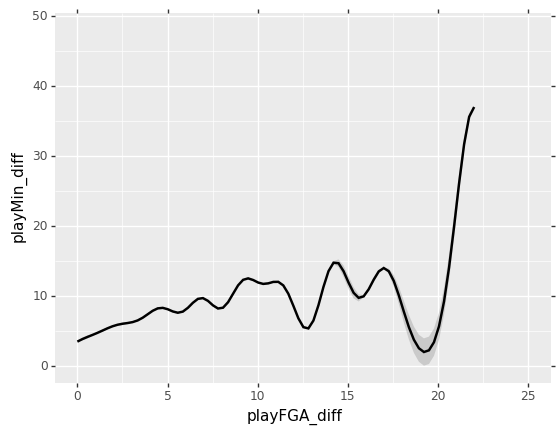

<ggplot: (7567954906)>

In [5]:
(ggplot(sampled_train, aes('playFGA_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 25) + ylim(0, 48))

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

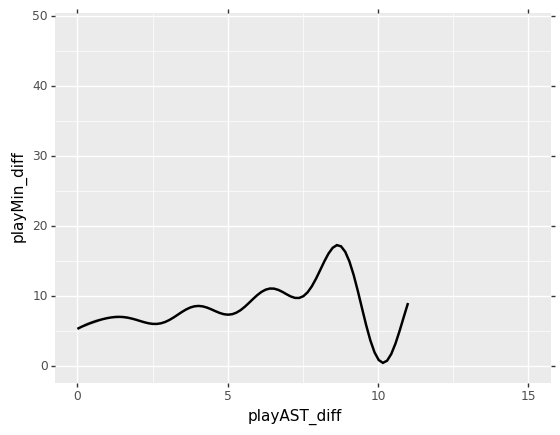

<ggplot: (-9223372029286811483)>

In [6]:
(ggplot(sampled_train, aes('playAST_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 15) + ylim(0, 48))

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

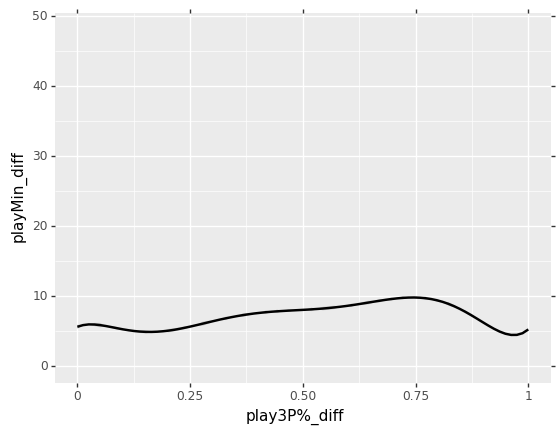

<ggplot: (7006756244)>

In [7]:
(ggplot(sampled_train, aes('play3P%_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 1) + ylim(0, 48))

In [8]:
df_X_val.head()

,playAST_diff,playSTL_diff,playBLK_diff,playPF_diff,playFGA_diff,playTRB_diff,playFG%_diff,play3P%_diff,playFT%_diff,IsStarter_diff
0,2.0,-1.0,1.0,0.0,6.0,-2.0,0.3091,0.0,-0.3333,0.0
1,0.0,1.0,1.0,3.0,2.0,0.0,0.6000,0.5,0.0000,0.0
2,0.0,0.0,1.0,0.0,1.0,-1.0,1.0000,1.0,0.0000,0.0
3,0.0,0.0,-1.0,1.0,-3.0,-3.0,-0.1000,0.0,0.5000,0.0
4,0.0,1.0,0.0,2.0,2.0,3.0,0.3333,0.0,0.5000,0.0


In [9]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [10]:
from pdpbox.pdp import pdp_plot, pdp_isolate
import pdpbox
def plot_pdp(model, X, feature_names, feature, clusters = None):
    iso = pdp_isolate(rfr, df_X_train, df_X_train.columns, feature)
    return pdp_plot(iso, feature, plot_lines = True, cluster=clusters, n_cluster_centers=clusters)

CPU times: user 30.2 s, sys: 1.88 s, total: 32.1 s
Wall time: 27.8 s


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c42a34940>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c42a6f240>})

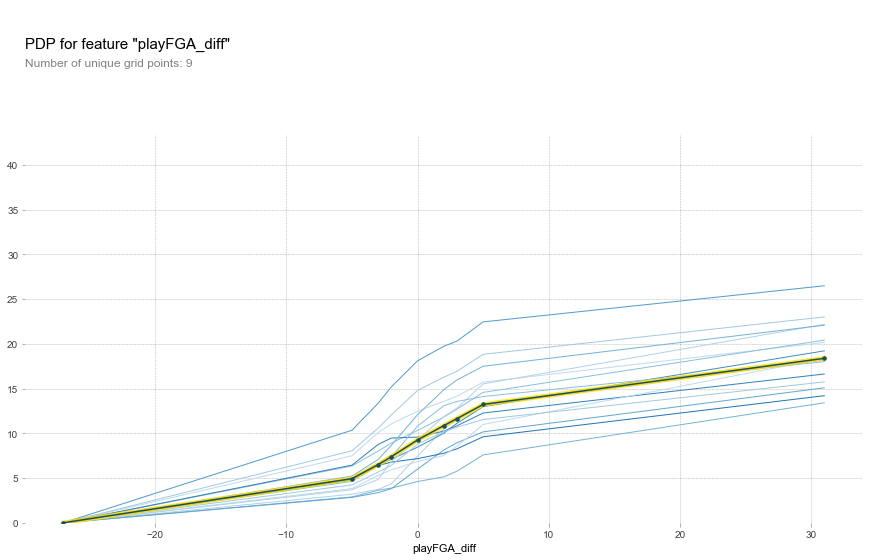

In [12]:
%%time
plot_pdp(rfr, df_X_train.sample(2000), df_X_train.columns, 'playFGA_diff', 15)

In [13]:
first_tree = rfr.estimators_[0]

In [14]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


def plot_tree(dt, feature_names, max_depth):
    return Source(tree.export_graphviz(dt, out_file=None,
                                feature_names=feature_names, max_depth=max_depth))

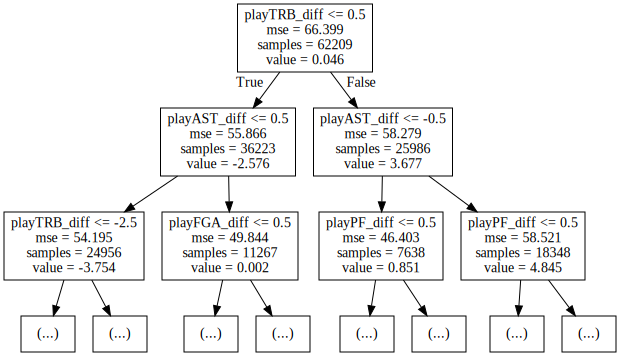

In [15]:
plot_tree(first_tree, df_X_train.columns, 2)

In [16]:
y_train.mean()

0.0038247707166626085

In [17]:
first_obs = df_X_train.loc[0]

In [18]:
import eli5
explained_df_first_obs = eli5.explain_prediction_df(first_tree, first_obs)

selected = explained_df_first_obs.feature.isin(['playFGA_diff', '<BIAS>', 'playTRB_diff'])
explained_df_first_obs[selected]

,target,feature,weight,value
0,y,playFGA_diff,2.650949,-1.0
1,y,<BIAS>,0.046354,1.0
7,y,playTRB_diff,-3.274584,-3.0


In [19]:
explained_df_first_obs_rfr = eli5.explain_prediction_df(rfr, first_obs)
explained_df_first_obs_rfr

,target,feature,weight,value
0,y,playSTL_diff,0.795334,2.0000
1,y,playPF_diff,0.219386,0.0000
2,y,playAST_diff,0.176382,0.0000
3,y,IsStarter_diff,0.162533,0.0000
4,y,playFT%_diff,0.087840,0.0000
5,y,play3P%_diff,0.004785,0.0000
6,y,<BIAS>,0.002065,1.0000
7,y,playFGA_diff,-0.308391,-1.0000
8,y,playBLK_diff,-0.766189,-1.0000
9,y,playTRB_diff,-2.737030,-3.0000


In [20]:
%%time
prediction_expls = []
for idx, row in df_X_val.iterrows():
    prediction_expls.append(eli5.explain_prediction_df(rfr, row))

In [21]:
train_expl_df = pd.concat(prediction_expls, keys=df_X_train.index, 
                         names=['observation'])

In [22]:
train_expl_df.value = train_expl_df.value.astype('float64')

In [23]:
train_expl_df.iloc[:5]

target         feature    weight   value
observation                                           
0           0      y    playFGA_diff  5.836550  6.0000
            1      y    playAST_diff  2.753211  2.0000
            2      y    playFG%_diff  0.011567  0.3091
            3      y          <BIAS>  0.002065  1.0000
            4      y  IsStarter_diff -0.146851  0.0000

In [24]:
train_unstacked_df = (train_expl_df.groupby(['observation','feature'])
                               .weight
                               .aggregate('first')
                               .unstack())
train_unstacked_df.head()

feature,<BIAS>,IsStarter_diff,play3P%_diff,playAST_diff,playBLK_diff,playFG%_diff,playFGA_diff,playFT%_diff,playPF_diff,playSTL_diff,playTRB_diff
observation,,,,,,,,,,,
0,0.002065,-0.146851,-0.834162,2.753211,-0.402691,0.011567,5.836550,-0.620877,-0.591603,-0.902978,-2.279231
1,0.002065,-0.239935,0.847898,0.069801,0.627985,1.172026,2.281086,-0.146858,3.819992,0.731075,-1.290135
2,0.002065,0.015663,0.338522,-0.397047,-0.594837,0.485241,1.145443,0.051806,-0.516004,0.023527,-2.318962
3,0.002065,0.237080,-0.357923,0.115581,-0.057027,0.989948,-2.893756,1.622446,1.434432,-0.351204,-2.941643
4,0.002065,-0.396503,-0.519060,-0.231811,0.031599,1.367954,0.937611,1.361810,1.898641,1.149996,2.322700


In [25]:
train_unstacked_df.describe()[train_unstacked_df.describe().index.isin(['mean', 'std'])]

feature,<BIAS>,IsStarter_diff,play3P%_diff,playAST_diff,playBLK_diff,playFG%_diff,playFGA_diff,playFT%_diff,playPF_diff,playSTL_diff,playTRB_diff
mean,2.064565e-03,0.002673,0.009476,-0.012851,-0.001142,0.016966,-0.027224,0.006393,-0.000461,-0.002087,0.008732
std,1.072081e-15,1.573748,0.720348,1.762080,0.761224,1.296302,3.969235,0.978348,1.284130,0.804577,2.594354


### Back to Plotting

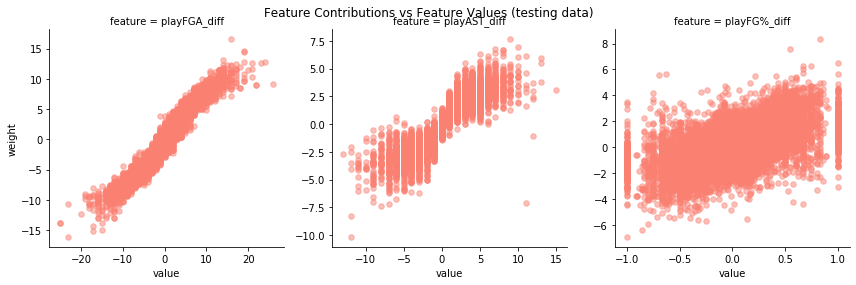

In [27]:
import seaborn as sns
fg = sns.lmplot(x='value', y='weight', col='feature',
                data=train_expl_df.loc[train_expl_df.feature.isin(['playFGA_diff', 'playAST_diff', 'playFG%_diff'])], 
                col_order=['playFGA_diff', 'playAST_diff', 'playFG%_diff'], sharex=False, sharey=False, col_wrap=3, fit_reg=False, 
                height=4, scatter_kws={'color':'salmon', 'alpha': 0.5, 's':30})


fg.fig.suptitle('Feature Contributions vs Feature Values (testing data)')
fg.fig.subplots_adjust(top=0.90);